In [1]:
!pip install qiskit[visualization] qiskit-aer rustworkx matplotlib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.4 MB/s eta 0:00:00


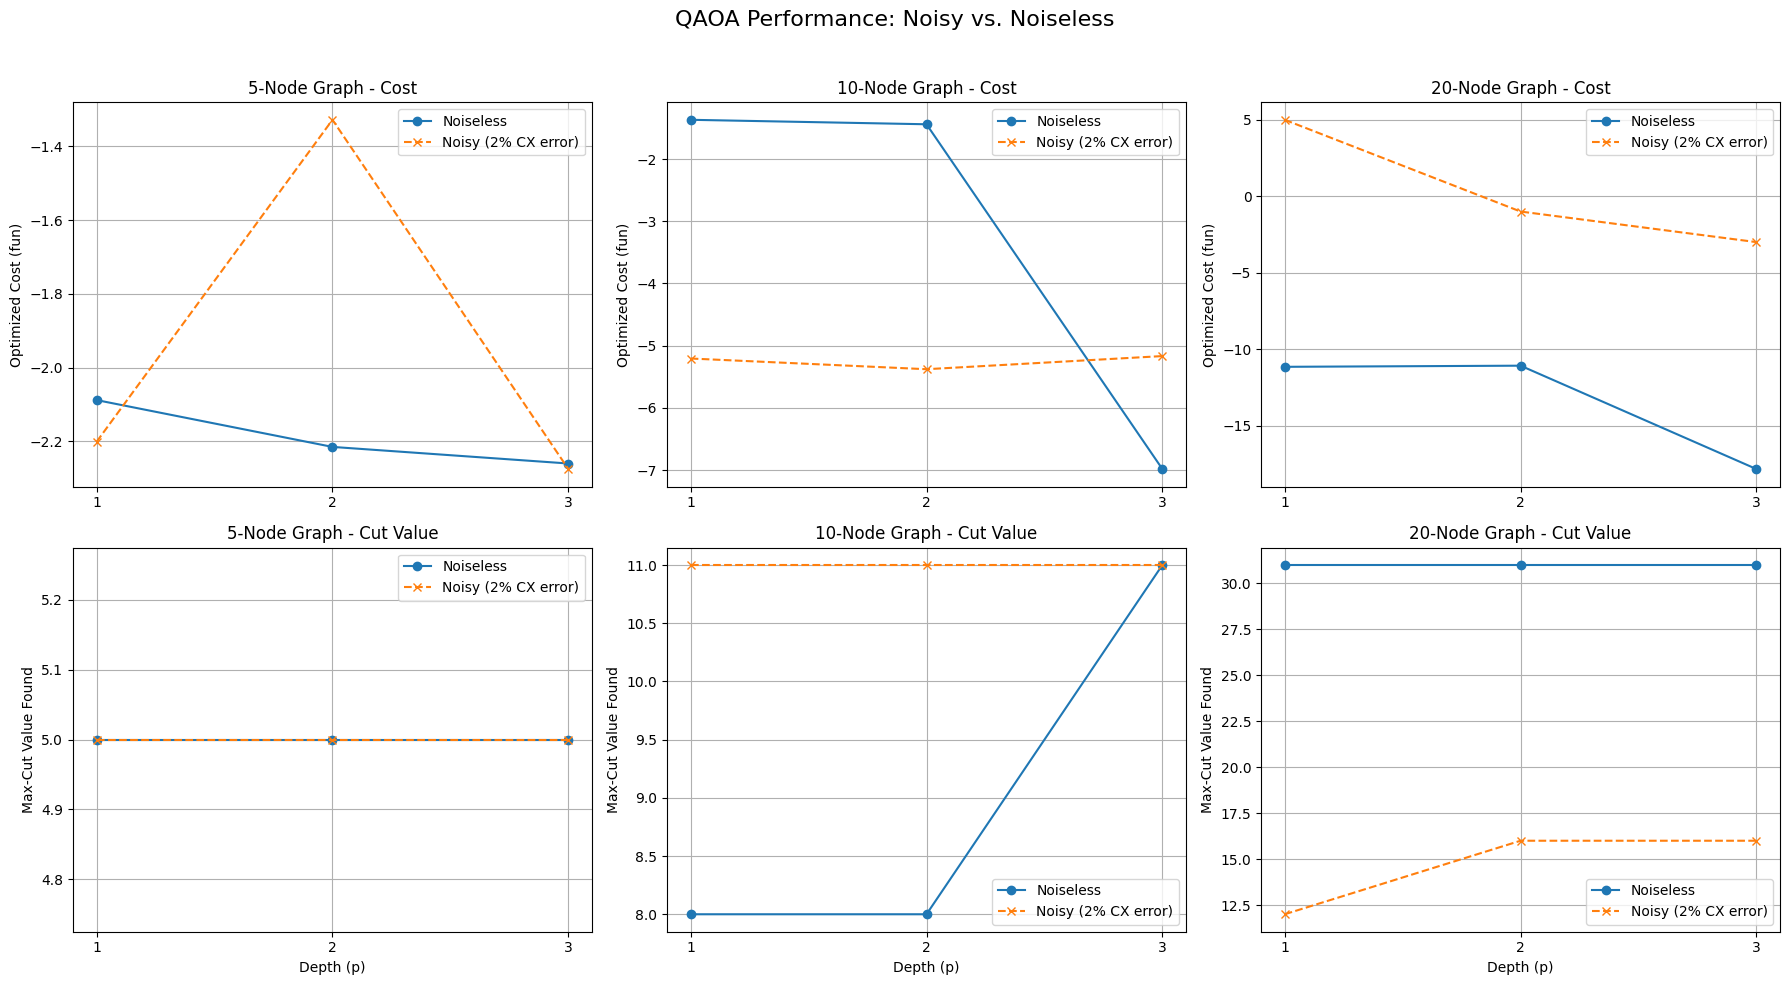

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# {graph_size: {metric: {simulation_type: [p=1, p=2, p=3]}}}
data = {
    5: {
        'cost': {
            'noiseless': [-2.088, -2.215, -2.260],
            'noisy':     [-2.201, -1.328, -2.275]
        },
        'cut': {
            'noiseless': [ 5, 5, 5],
            'noisy':     [ 5, 5, 5]
        }
    },
    10: {
        'cost': {
            'noiseless': [-1.369, -1.441, -6.984],
            'noisy':     [-5.207, -5.379, -5.168]
        },
        'cut': {
            'noiseless': [8, 8, 11],
            'noisy':     [ 11, 11, 11]
        }
    },
     20: {
        'cost': {
            'noiseless': [-11.156, -11.082, -17.842],
            'noisy':     [ 5.0, -1.0,  -3.0   ]
        },
        'cut': {
            'noiseless': [31, 31, 31],
            'noisy':     [ 12, 16,  16 ]
        }
    }
}

depths = [1, 2, 3]
graph_sizes = [5, 10, 20]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('QAOA Performance: Noisy vs. Noiseless', fontsize=16)

for i, size in enumerate(graph_sizes):
    axes[0, i].plot(depths, data[size]['cost']['noiseless'], marker='o', linestyle='-', label='Noiseless')
    axes[0, i].plot(depths, data[size]['cost']['noisy'], marker='x', linestyle='--', label='Noisy (2% CX error)')
    axes[0, i].set_title(f'{size}-Node Graph - Cost')
    axes[0, i].set_ylabel('Optimized Cost (fun)')
    axes[0, i].set_xticks(depths)
    axes[0, i].grid(True)
    axes[0, i].legend()

    axes[1, i].plot(depths, data[size]['cut']['noiseless'], marker='o', linestyle='-', label='Noiseless')
    axes[1, i].plot(depths, data[size]['cut']['noisy'], marker='x', linestyle='--', label='Noisy (2% CX error)')
    axes[1, i].set_title(f'{size}-Node Graph - Cut Value')
    axes[1, i].set_ylabel('Max-Cut Value Found')
    axes[1, i].set_xlabel('Depth (p)')
    axes[1, i].set_xticks(depths)
    axes[1, i].grid(True)
    axes[1, i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

--- Noiseless Simulation Results ---

Optimized Cost Table (Noiseless):
     5 Nodes  10 Nodes  20 Nodes
p=1   -2.088    -1.369   -11.156
p=2   -2.215    -1.441   -11.082
p=3   -2.260    -6.984   -17.842

Max-Cut Value Table (Noiseless):
     5 Nodes  10 Nodes  20 Nodes
p=1        5         8        31
p=2        5         8        31
p=3        5        11        31


--- Noisy Simulation Results (2% CX Error) ---

Optimized Cost Table (Noisy):
     5 Nodes  10 Nodes  20 Nodes
p=1   -2.201    -5.207       5.0
p=2   -1.328    -5.379      -1.0
p=3   -2.275    -5.168      -3.0

Max-Cut Value Table (Noisy):
     5 Nodes  10 Nodes  20 Nodes
p=1        5        11        12
p=2        5        11        16
p=3        5        11        16


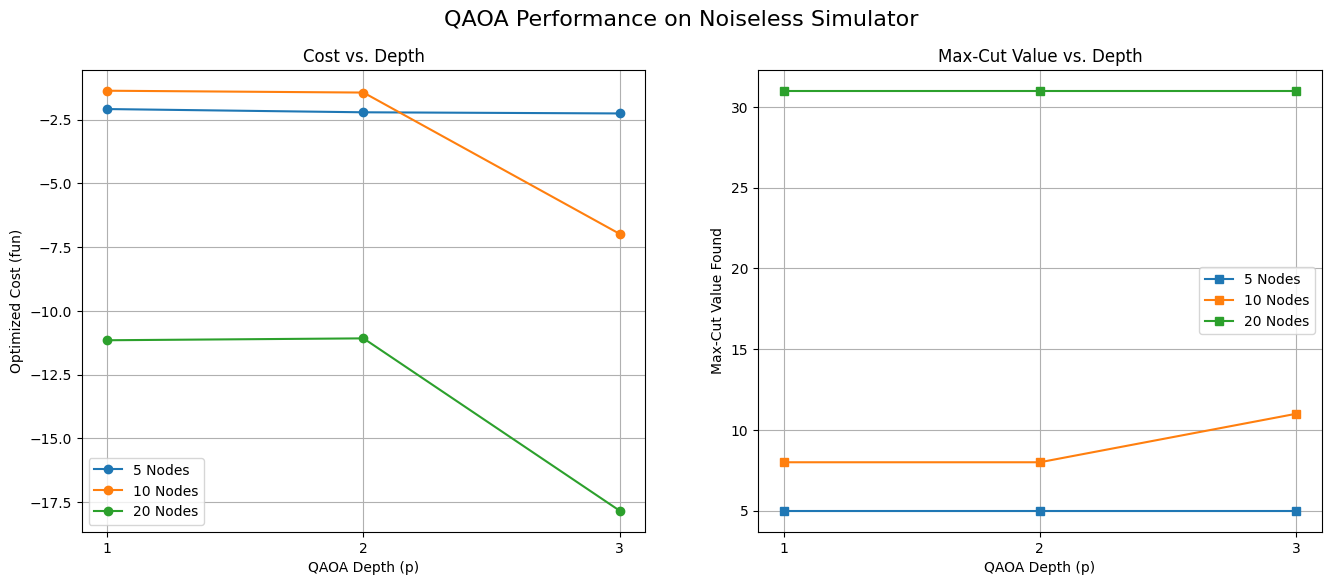

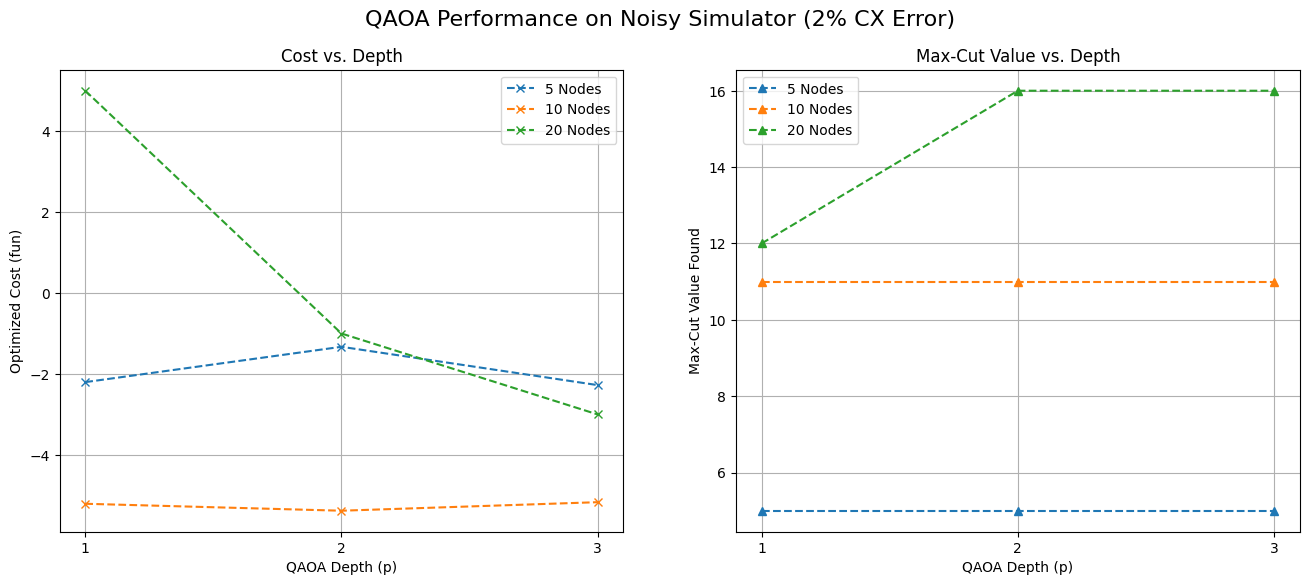

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# {graph_size: {metric: {simulation_type: [p=1, p=2, p=3]}}}
data = {
    5: {
        'cost': {
            'noiseless': [-2.088, -2.215, -2.260],
            'noisy':     [-2.201, -1.328, -2.275]
        },
        'cut': {
            'noiseless': [ 5, 5, 5],
            'noisy':     [ 5, 5, 5]
        }
    },
    10: {
        'cost': {
            'noiseless': [-1.369, -1.441, -6.984],
            'noisy':     [-5.207, -5.379, -5.168]
        },
        'cut': {
            'noiseless': [8, 8, 11],
            'noisy':     [ 11, 11, 11]
        }
    },
     20: {
        'cost': {
            'noiseless': [-11.156, -11.082, -17.842],
            'noisy':     [ 5.0, -1.0,  -3.0   ]
        },
        'cut': {
            'noiseless': [31, 31, 31],
            'noisy':     [ 12, 16,  16 ]
        }
    }
}

depths = [1, 2, 3]
graph_sizes = [5, 10, 20]

cost_df_noiseless = pd.DataFrame(
    {f'{n} Nodes': data[n]['cost']['noiseless'] for n in graph_sizes},
    index=[f'p={d}' for d in depths]
)
cut_df_noiseless = pd.DataFrame(
    {f'{n} Nodes': data[n]['cut']['noiseless'] for n in graph_sizes},
    index=[f'p={d}' for d in depths]
)

cost_df_noisy = pd.DataFrame(
    {f'{n} Nodes': data[n]['cost']['noisy'] for n in graph_sizes},
    index=[f'p={d}' for d in depths]
)
cut_df_noisy = pd.DataFrame(
    {f'{n} Nodes': data[n]['cut']['noisy'] for n in graph_sizes},
    index=[f'p={d}' for d in depths]
)

print("--- Noiseless Simulation Results ---")
print("\nOptimized Cost Table (Noiseless):")
print(cost_df_noiseless)
print("\nMax-Cut Value Table (Noiseless):")
print(cut_df_noiseless)

print("\n\n--- Noisy Simulation Results (2% CX Error) ---")
print("\nOptimized Cost Table (Noisy):")
print(cost_df_noisy)
print("\nMax-Cut Value Table (Noisy):")
print(cut_df_noisy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('QAOA Performance on Noiseless Simulator', fontsize=16)

# Noiseless Cost vs. Depth
for n in graph_sizes:
    ax1.plot(depths, data[n]['cost']['noiseless'], marker='o', label=f'{n} Nodes')
ax1.set_xlabel('QAOA Depth (p)')
ax1.set_ylabel('Optimized Cost (fun)')
ax1.set_title('Cost vs. Depth')
ax1.set_xticks(depths)
ax1.legend()
ax1.grid(True)

# Noiseless Cut Value vs. Depth
for n in graph_sizes:
    ax2.plot(depths, data[n]['cut']['noiseless'], marker='s', label=f'{n} Nodes')
ax2.set_xlabel('QAOA Depth (p)')
ax2.set_ylabel('Max-Cut Value Found')
ax2.set_title('Max-Cut Value vs. Depth')
ax2.set_xticks(depths)
ax2.legend()
ax2.grid(True)
plt.show()


fig_noisy, (ax_n1, ax_n2) = plt.subplots(1, 2, figsize=(16, 6))
fig_noisy.suptitle('QAOA Performance on Noisy Simulator (2% CX Error)', fontsize=16)

# Noisy Cost vs. Depth
for n in graph_sizes:
    ax_n1.plot(depths, data[n]['cost']['noisy'], marker='x', linestyle='--', label=f'{n} Nodes')
ax_n1.set_xlabel('QAOA Depth (p)')
ax_n1.set_ylabel('Optimized Cost (fun)')
ax_n1.set_title('Cost vs. Depth')
ax_n1.set_xticks(depths)
ax_n1.legend()
ax_n1.grid(True)

# Noisy Cut Value vs. Depth
for n in graph_sizes:
    ax_n2.plot(depths, data[n]['cut']['noisy'], marker='^', linestyle='--', label=f'{n} Nodes')
ax_n2.set_xlabel('QAOA Depth (p)')
ax_n2.set_ylabel('Max-Cut Value Found')
ax_n2.set_title('Max-Cut Value vs. Depth')
ax_n2.set_xticks(depths)
ax_n2.legend()
ax_n2.grid(True)
plt.show()